<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/haal_of_fame/An%C3%A1lisis_de_sentimientos_the_office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de sentimientos serie "The Office"**

"The Office" es una serie de televisión estadounidense que se grabó entre 2005-2013, con un total de 201 episodios en 9 temporadas. Esta está ambientada en el diario vivir de una oficina de venta de papel en Scranton, Pennsylvania y las situaciones humorísticas que viven sus personajes. En este trabajo se analizarán Tweets para un análisis de sentimientos con respecto a los comentarios.

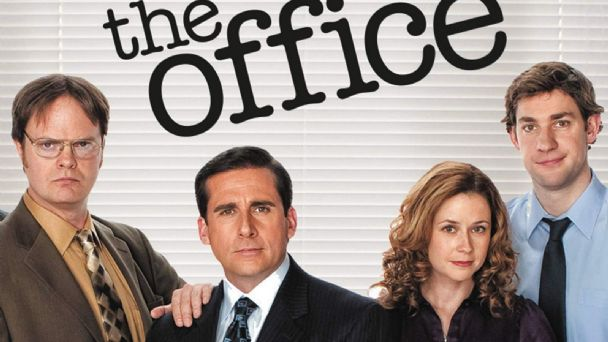

In [ ]:
#!pip install wordcloud
import re
import unicodedata
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

import pandas as pd
from collections import Counter
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_excel('TheOffice_en.xlsx')


In [ ]:
df['Tweet_Text'] = df['Tweet_Text'].str.lower()
import re
import unicodedata

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
  
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess_expresiones_regulares(s, lowercase=False, quitar_tildes=False):
    if quitar_tildes:
      s = strip_accents(s) 
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
import nltk
from nltk.tokenize import WordPunctTokenizer 
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
from collections import Counter
palabras_todas = []
count_all = Counter()
for tweet in df["Tweet_Text"]:
  # Crear una lista de todos los terminos con NLTK
  terms_all = tweet_tokenizer.tokenize(tweet)
  # Actualizar el contador
  count_all.update(terms_all)
  # Aumentar al listado de todas las palabras
  palabras_todas.extend(terms_all)
  

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
otros_a_quitar = ['»', ';', ',', '.','!','?','¿',',','rt', 'via' ]
 
punctuation = list(string.punctuation)
stop = stopwords.words('spanish') + stopwords.words('english') + punctuation
print(stop)
print('Total de stop words: ', len(stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', '

In [ ]:
count_stop = Counter()
count_hash = Counter()
count_mentions = Counter()
count_terms_only = Counter()
lista_todas = []
lista_hash = []
lista_mentions = []
lista_terms_only = []
for tweet in df["Tweet_Text"]:
  terms_stop = [term for term in tweet_tokenizer.tokenize(tweet) if term not in stop]
  count_stop.update(terms_stop)
  lista_todas.extend(terms_stop)
  terms_hash = [term for term in tweet_tokenizer.tokenize(tweet) if term.startswith('#')]
  count_hash.update(terms_hash)
  lista_hash.extend(terms_hash)
  terms_mentions = [term for term in tweet_tokenizer.tokenize(tweet) if term.startswith('@')]
  count_mentions.update(terms_mentions)
  lista_mentions.extend(terms_mentions)
  terms_only = [term for term in tweet_tokenizer.tokenize(tweet) if term not in stop and not term.startswith(('#', '@', 'http'))]
  count_terms_only.update(terms_only)
  lista_terms_only.extend(terms_only)

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,1)})
def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")
def visualise_sentiments_from_sentence(sentence):
  visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()] })
  import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


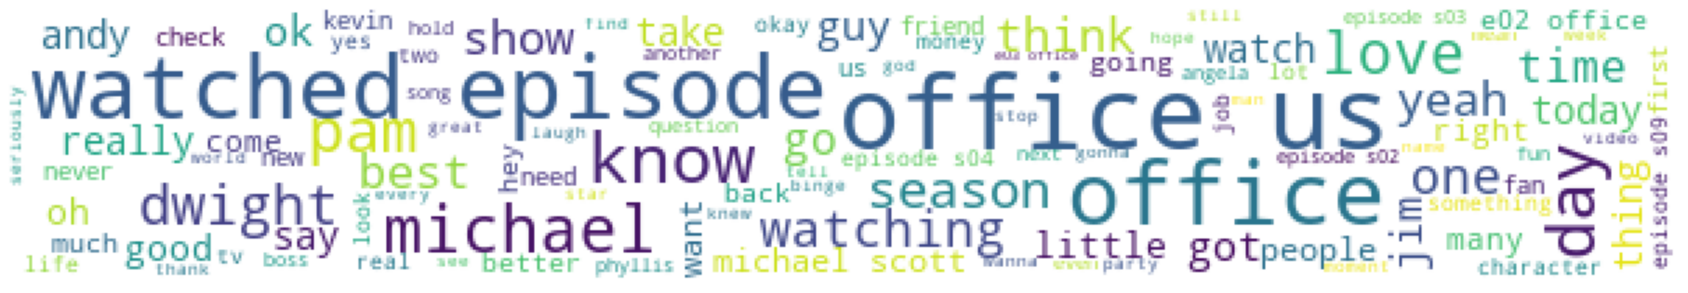

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_string=(" ").join(lista_terms_only)
wordcloud = WordCloud(width = 600, height = 100, background_color="white",).generate(unique_string)
plt.figure(figsize=(30,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

(-0.5, 224.5, 224.5, -0.5)

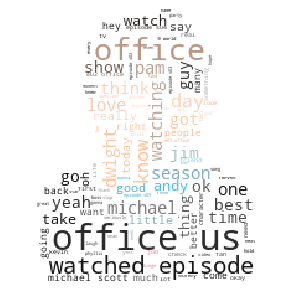

In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import requests
import matplotlib.pyplot as plt

unique_string=(" ").join(lista_terms_only)
mask = np.array(Image.open("foto.jpeg") )
wordcloud_por = WordCloud(background_color="white", max_words=5000, mask=mask).generate(unique_string)

plt.figure(figsize=[5,20])
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="none")
plt.axis("off")


Una de las cosas más interesantes de este wordcloud es la palabra "office us". Esta serie estadounidense es una adaptación de la versión originial británica. Además, las palabras más comunes son nombres de los personajes de la serie, pero solamente aparecen los nombres de la versión estadounidense, por lo que podría decirse desde ya que la versión más famosa en Tweets es la estadounidense.

In [ ]:

def get_polarity_score_compound(text):
    return sid.polarity_scores(text)['compound']
   

In [ ]:
 df['sentimiento'] = df.Tweet_Text.apply( get_polarity_score_compound )

In [ ]:
# df['positivo_negativo'] = np.where(df['sentimiento']>0, 'Positivo', 'Negativo')
df['positivo_negativo'] = ''

In [ ]:
df.loc[(df['sentimiento']>=0.15),  'positivo_negativo'] = 'positivo'

In [ ]:
df.loc[(df['sentimiento']<=-0.15),  'positivo_negativo'] = 'negativo'

In [ ]:
df.loc[(df['sentimiento']> -0.15) & (df['sentimiento']<0.15) ,  'positivo_negativo'] = 'neutral'

In [ ]:
df.positivo_negativo.value_counts()

neutral     235
positivo    193
negativo     72
Name: positivo_negativo, dtype: int64

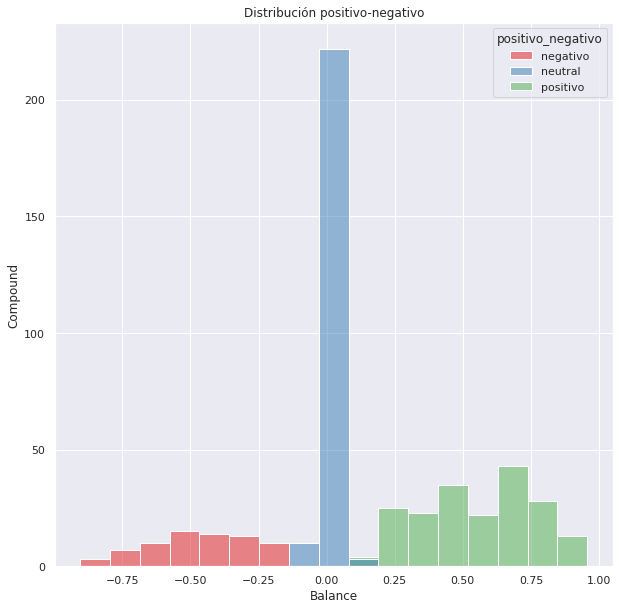

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(x= df.sentimiento, hue= df.positivo_negativo, palette='Set1')
plt.title('Distribución positivo-negativo')
plt.xlabel('Balance')
plt.ylabel('Compound')
plt.show()

En general, la mayor parte de los tuits se consideran neutrales (-0,15;0,15), con un total de 235. Además, hay 193 positivos y 72 negativos. Por lo tanto, el ambiente de la conversación sobre The Office en Tweeter es neutral, pero hay una tendencia también inclinándose hacia comentarios positivos. Podría decirse entonces que esta serie genera buenas emociones en las personas y sus comentarios.